## Load the Dataset

# Marketing Campaign Performance Insights
#### Objective:
This project analyzes digital marketing campaigns to optimize ROI and performance by examining key metrics like conversion rates, acquisition costs, and ROI across various channels, campaign types, and audience segments. It explores temporal trends, geographical influences, and audience behavior to identify success factors and enhance future marketing strategies.

--------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("marketing_campaign.csv")

##  Descriptive Analysis

##### a) Basic Structure :

Overview of the dataset using `head()` function

In [ ]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023
2,3,NexGen Systems,Social Media,Women 25-34,45 days,Instagram,4.056375,9111,73.20,Miami,Spanish,3156,86240,8,Fashionistas,01-01-2023
3,4,Innovate Industries,Email,Women 25-34,45 days,Instagram,4.496375,7420,60.92,Seattle,Spanish,2388,58251,6,Foodies,01-01-2023
4,5,Data Tech Solutions,Influencer,Men 25-34,30 days,Google Ads,4.405930,2146,138.82,Chicago,English,1025,34407,5,Tech Enthusiasts,01-01-2023


In [ ]:
row, col = df.shape
print(f"{'Number of rows':<20}: {row}\n{'Number of columns':<20}: {col:<20}")

Number of rows      : 22029
Number of columns   : 16                  


Concise summary using `info()` function of the dataset. The Dtype of Date isn't datatime. I changed this in the Time-Based Analysis section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

`Descriptive statistics` for numerical columns

In [ ]:
df.describe().round(2)

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,22029.00,22029.00,22029.00,22029.00,22029.00,22029.00,22029.00
mean,11015.00,4.76,5522.74,182.86,2223.81,50610.40,6.58
std,6359.37,0.96,2597.67,301.62,1394.17,28542.98,1.46
min,1.00,2.02,1000.00,-98.30,30.00,1001.00,4.00
25%,5508.00,4.13,3286.00,-4.08,1067.00,25804.00,5.00
50%,11015.00,4.76,5525.00,93.65,2088.00,50858.00,7.00
75%,16522.00,5.43,7766.00,247.31,3212.00,75165.00,8.00
max,22029.00,7.47,9999.00,3109.79,6887.00,99999.00,9.00


##### b) Data exploration :

From the `descriptive statistics` and `nunique` function, we can clearly identify that "Campaign_ID" is the "primary key" in the dataset and moreover we don't have any duplicates in our dataset.

In [ ]:
print("Number of Unique Values:", df.Campaign_ID.nunique())

Number of Unique Values: 22029


Unique values of the Location and Customer_Segment columns.

In [ ]:
print("Unique Values in Location attribute:\n\n", df.Location.unique(),
      "\n\nUnique Values in Customer_Segment attribute:\n\n", df.Customer_Segment.unique())

Unique Values in Location attribute:

 ['Houston' 'Washington, D.C.' 'Miami' 'Seattle' 'Chicago' 'Los Angeles'
 'Atlanta' 'Dallas' 'New York' 'San Francisco'] 

Unique Values in Customer_Segment attribute:

 ['Tech Enthusiasts' 'Foodies' 'Fashionistas' 'Outdoor Adventurers'
 'Health & Wellness']


Occurrences of each category in the "Campaign_Type" and "Channel_Used" columns. This shows that there is no
significant difference in count of each values. The data is evenly distributed.

In [ ]:
df.Campaign_Type.value_counts()

Campaign_Type
Display         4450
Search          4441
Social Media    4412
Email           4388
Influencer      4338
Name: count, dtype: int64

In [ ]:
df.Channel_Used.value_counts()

Channel_Used
Facebook      3742
Google Ads    3694
Website       3688
Instagram     3649
YouTube       3632
Email         3624
Name: count, dtype: int64

## Exploratory Data Analysis (EDA) and Visualization

### Campaign Performance :

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Acquisition Cost by Return of Investment
Acquisition Cost is inversely ∝ to ROI, which shows that profitability is reduced with high acquisition cost, indicating the need for strategic adjustments.

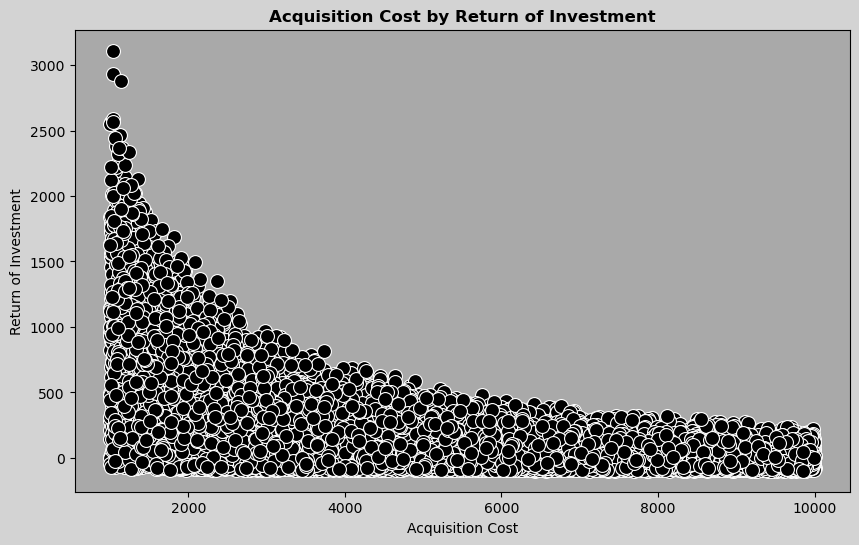

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.scatterplot(x="Acquisition_Cost", y="ROI", data=df, color='black', s=100)

plt.gca().set_facecolor('darkgrey')

plt.title("Acquisition Cost by Return of Investment", fontweight='bold')
plt.xlabel("Acquisition Cost")
plt.ylabel("Return of Investment")

plt.show()

##### Average Coversion Rate across Channel Used and Campaign Type
- The bar plot suggests that the marketing efforts are generally successful across all channels and campaign types, with only minor variations in performance.<br>
- Influencer campaigns (blue bars) tend to have slightly higher conversion rates across most channels, particularly on Facebook and websites. This indicates that influencer marketing may be a particularly effective strategy.<br>
- Interestingly, email campaigns have the highest conversion rate on Instagram, suggesting a potential synergy between email and Instagram marketing.<br>
- Social Media Campaign Type has slightly lower conversion rates on Facebook and Instagram, which is somewhat unexpected given these are social platforms.<br>
- Display ads (purple bars) show consistent performance across channels, with a slight edge on Facebook.<br>
- Search campaigns (orange bars) perform relatively well across all channels.

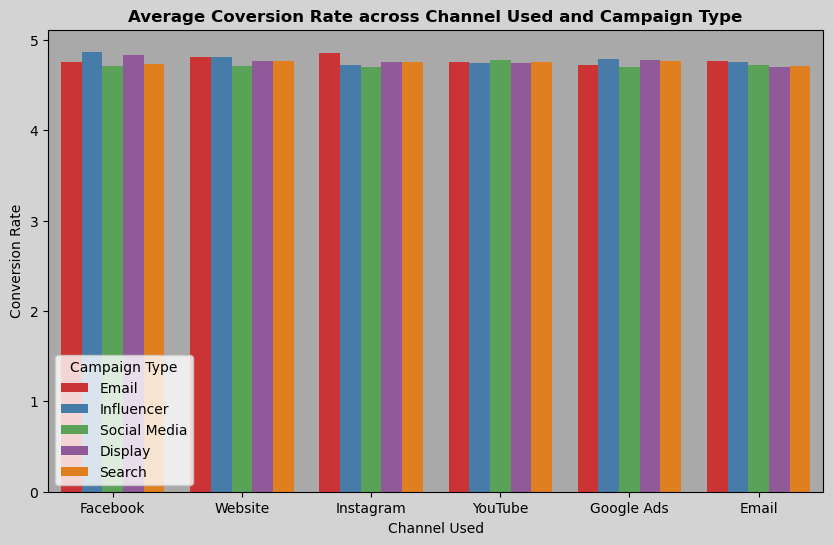

In [ ]:
order_CR = df.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Channel_Used', y='Conversion_Rate', hue='Campaign_Type', data=df, order=order_CR, palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average Coversion Rate across Channel Used and Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Conversion Rate')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()

##### Engagement Score by Campaign Type
- There don't appear to be any significant outliers for any campaign type.<br>
- All campaign types show generally good engagement, with most scores falling between 5 and 8.<br>
- The median and interquartile range shows equal performance among the Campaign Types with considerable overlap in the engagement scores but, Email has    the lowerst median, indicating more variability in engagement.<br>
- Social Media has the smallest interquartile range (box size), suggesting more consistent engagement.

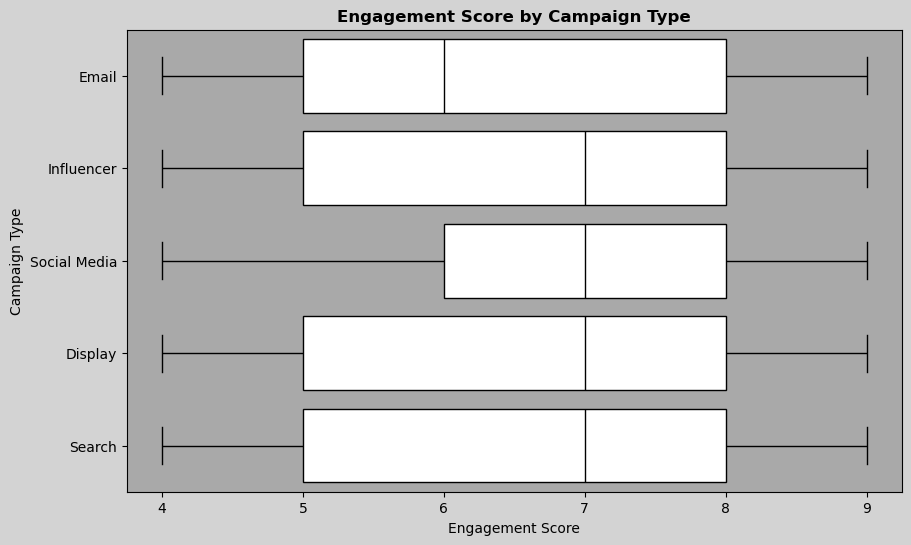

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.boxplot(x='Engagement_Score', y='Campaign_Type', data=df, color='white', linecolor='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Engagement Score by Campaign Type', fontweight='bold')
plt.xlabel('Engagement Score')
plt.ylabel('Campaign Type')

plt.show()

##### Average Return of Investment by Company
All most all the companies in the dataset have uniform average ROI, indicating equal performance and competition. But, "Alpha Innovations" and "NextGen Systems" has a bit taller bar which shows they are the forerunners in the dataset in terms of efficiency.

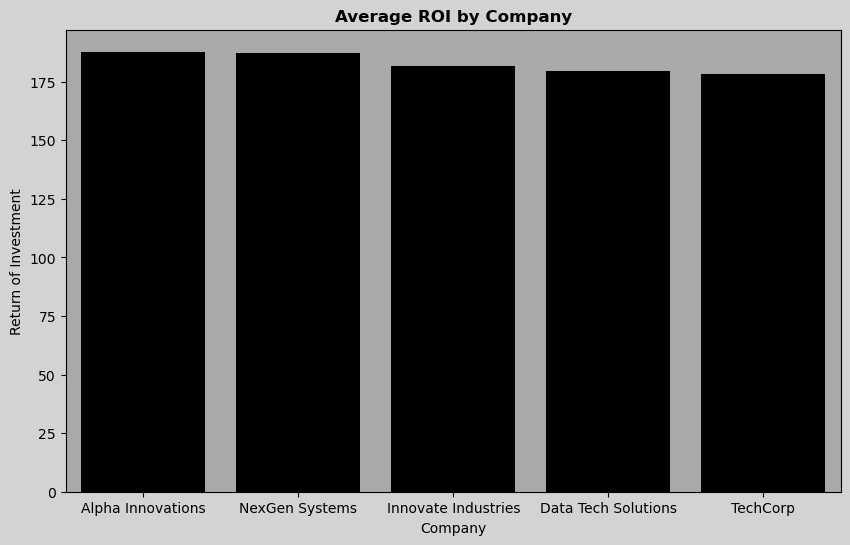

In [ ]:
order_ROI = df.groupby('Company')['ROI'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Company', y='ROI', data=df, order=order_ROI, color='black', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average ROI by Company', fontweight='bold')
plt.ylabel('Return of Investment')

plt.show()

##### Correlation between Engagement Score and Conversion Rate
- From the HeatMap we can clearly see that there is a very weak positive relationship (independent) between "Conversion Rate" and "Engagement Rate" matrices.<br>
- The lack of strong correlation suggests that other factors may be influencing these metrics independently. Conversion rates might be affected by factors like marketing effectiveness, while engagement could be driven by content quality, user interface, or community features.

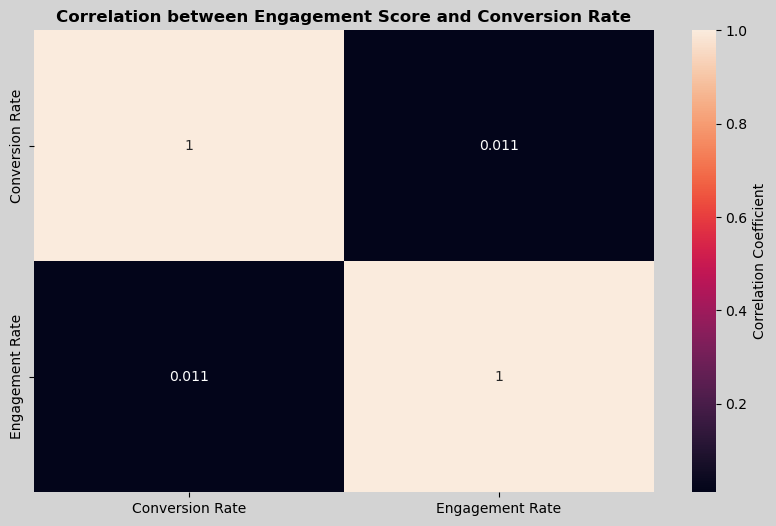

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.heatmap(df[['Conversion_Rate','Engagement_Score']].corr(), annot=True,
            cbar_kws={'label': 'Correlation Coefficient'},
            xticklabels=['Conversion Rate', 'Engagement Rate'], yticklabels=['Conversion Rate', 'Engagement Rate'])

plt.title('Correlation between Engagement Score and Conversion Rate', fontweight='bold')

plt.show()

##### Campaign Performance Conclusion:
- Overall, while the campaigns are generally effective, the insights indicate areas for improvement, particularly in managing acquisition costs and Focus on creating content that not only engages but also nudges users towards conversion and should provide further 'Call To Action'.<br>
- Further analyzing the audience and Reevaluate targeting efforts to ensure that the audience being engaged is also likely to convert

### Customer Segmentation:
##### Distributuon of Target Audience
- The target audience appears to be primarily focused on individuals between 25-44 years old, with a particular emphasis on the 25-34 age range for both men and women.<br>
-  Women seem to be a larger part of the target audience, especially in the 25-34 age group. This could indicate that the product or service is more appealing to or targeted towards women.<br>
-  The inclusion of the 18-24 male demographic suggests an effort to capture a younger audience, albeit in smaller numbers compared to other groups.

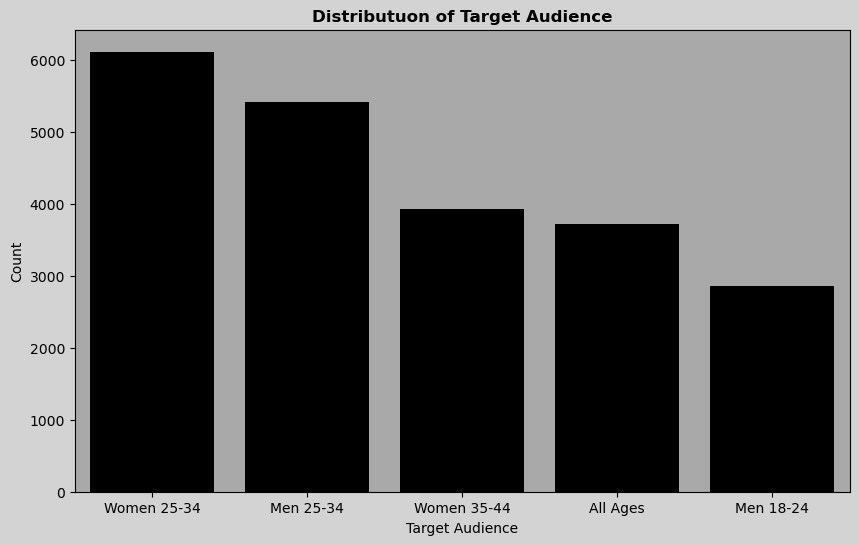

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.countplot(x='Target_Audience', data=df, color='black', order=df.Target_Audience.value_counts().index)

plt.gca().set_facecolor('darkgrey')

plt.title('Distributuon of Target Audience', fontweight='bold')
plt.xlabel('Target Audience')
plt.ylabel('Count')

plt.show()

##### Maximum Conversion Rate across Customer Segment by Language
- There is no customer segment which stands out from the crowd, showing equal potential among the customer segment.<br>
- Spanish, German, French, and Mandarin consistently show higher conversion rate across all customer segments.<br>
- There's a significant gap between English and other languages, suggesting high potential for conversion with non-English speakers.<br>
- The high performance of multiple non-English languages indicates successful localization efforts for these markets.<br>

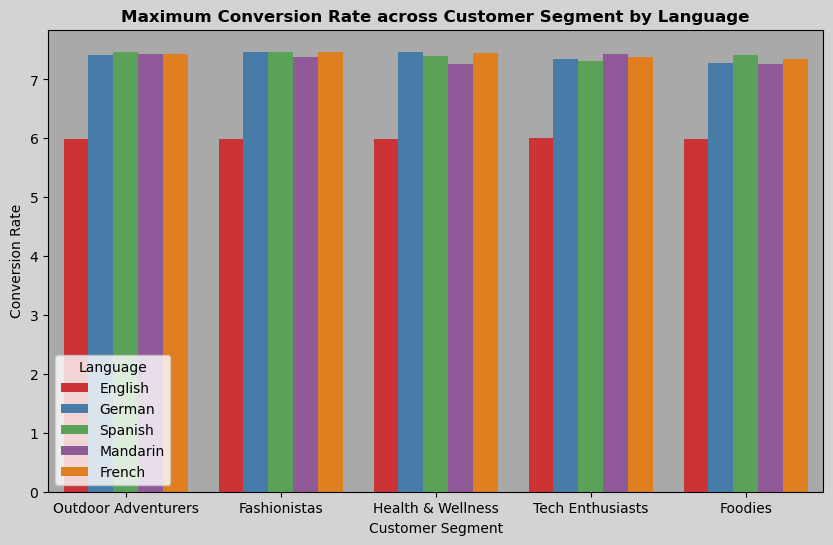

In [ ]:
order_CS = df.groupby('Customer_Segment')['Conversion_Rate'].max().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Customer_Segment', y='Conversion_Rate', hue='Language', data=df, order=order_CS, estimator='max',
            palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Maximum Conversion Rate across Customer Segment by Language', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.legend(title='Language', loc='lower left')

plt.show()

- Even though non-English speaker have maximum Conversion Rate, when it comes to efficiency perspective English speaking audience has high Conversion Rate.<br>
- This shows that non-English speaking audience has high potential than the English speaking audience also all campaigns shows successful localisation efforts.

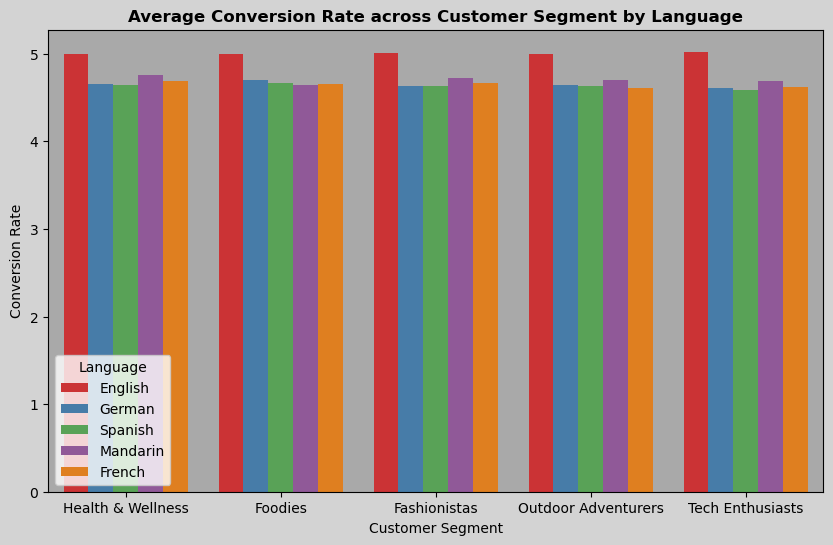

In [ ]:
order_CS = df.groupby('Customer_Segment')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Customer_Segment', y='Conversion_Rate', hue='Language', data=df, order=order_CS, palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average Conversion Rate across Customer Segment by Language', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Conversion Rate')
plt.legend(title='Language', loc='lower left')

plt.show()

##### Distribution of Acquisition Cost across Customer Segment by Channel Used
- Unlike typical box plots, this chart shows the full range of data without marking any points as outliers.<br>
- There's significant variation in acquisition costs both within and across customer segments and channels, as shown by the different box sizes and positions.<br>
- The upper limit of 10,000 is consistent across all segments and channels, indicating a possible cap on acquisition spending.<br>
    
**Channel-Specific Insights:**
  - Facebook and Google Ads show fairly consistent acquisition costs across all segments.<br>
  - Email tends to show lower acquisition costs compared to other channels.<br>
  - Instagram has a relatively high acquisition cost for Fashionistas. This suggests that Instagram is more expensive for this customer segment.<br>
  - The Health & Wellness segment shows less spread across most channels. This indicates that acquisition costs in this segment are more consistent.<br>

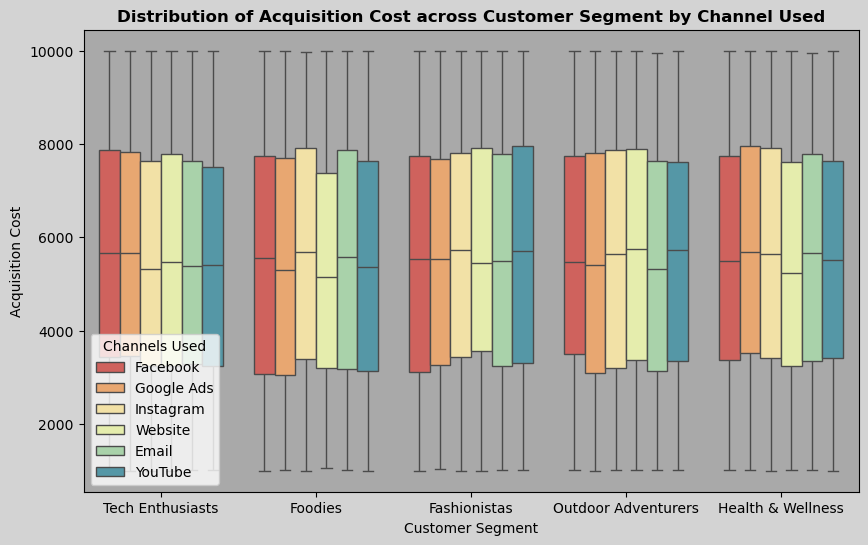

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

sns.boxplot(y='Acquisition_Cost', x='Customer_Segment', hue='Channel_Used', data=df, palette='Spectral')

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Acquisition Cost across Customer Segment by Channel Used', fontweight='bold')
plt.xlabel('Customer Segment')
plt.ylabel('Acquisition Cost')
plt.legend(title='Channels Used', loc='lower left')

plt.show()

##### Average Conversion Rate by Language
- The conversion rates for all languages fall within a relatively narrow range, approximately between 4.5 and 5.0.<br>
- The conversion rates for German, Spanish, Mandarin, and French are very similar, with only slight variations between them.<br>
- The higher conversion rate for English could be due to larger English-speaking online market and More refined marketing strategies for English-speaking audiences.

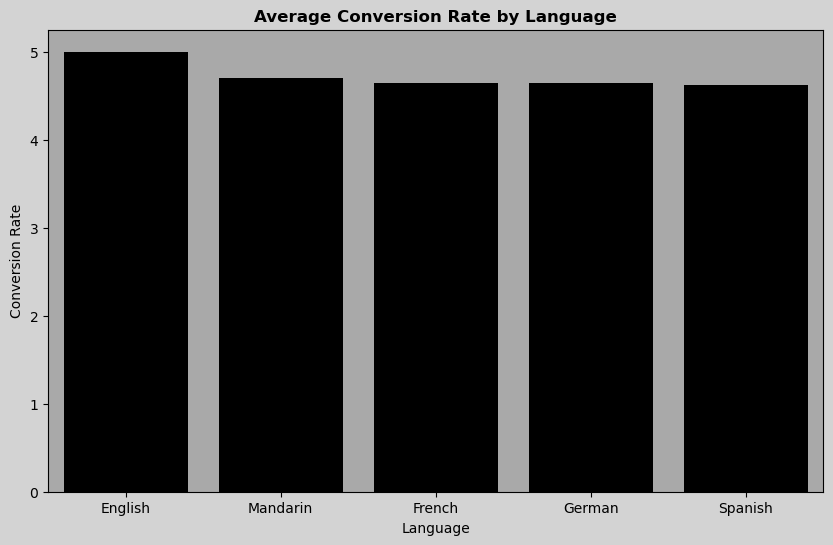

In [ ]:
order_CRL = df.groupby('Language')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Language', y='Conversion_Rate', data=df, order=order_CRL, color='black', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Average Conversion Rate by Language', fontweight='bold')
plt.ylabel('Conversion Rate')

plt.show()

##### Customer Segmentation Conclusion:
- The target audience skews toward women aged 25-34, indicating a strong appeal for this demographic, while non-English-speaking segments show high conversion rates, reflecting successful localization strategies.<br>
- Despite English having the highest average conversion rate overall, the similar performance across non-English languages suggests consistent marketing effectiveness, with acquisition costs showing variability across segments and channels within a capped range.

###  Channel Effectivenes:
##### Engagement Score across Channel Used by Campaign Type
- The engagement scores are relatively consistent across all channels. There are slight variations, but no channel significantly underperforms or outperforms the others.<br>
- Social media campaigns consistently show the highest engagement scores across all channels. This suggests that social media is the most effective campaign type regardless of the platform used.<br>
- <strong>Social Media > Influencer ≈ Email > Display ≈ Search</strong>. This ranking is generally consistent across all channels.<br>
- Email campaigns perform slightly better on the Email channel, which is logical.<br>
- Influencer campaigns seem to perform marginally better on Instagram compared to other channels.

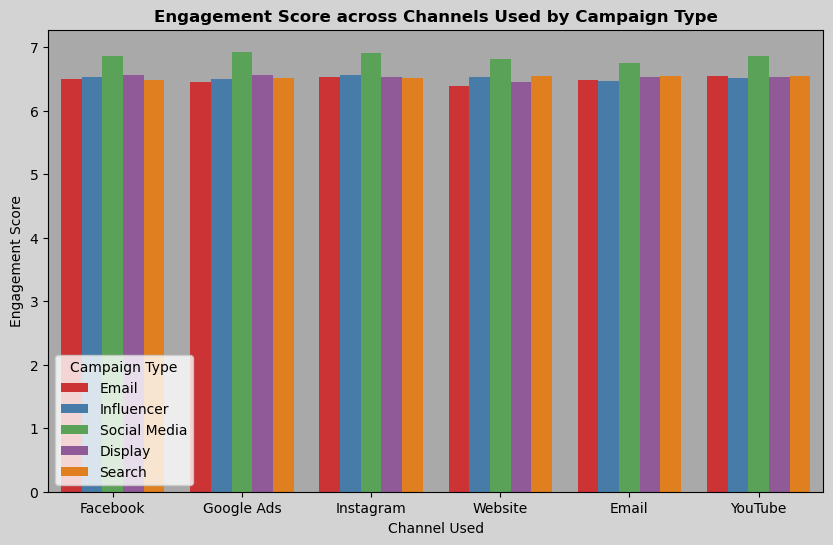

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.barplot(x='Channel_Used', y='Engagement_Score', hue='Campaign_Type', data=df, palette='Set1', errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Engagement Score across Channels Used by Campaign Type', fontweight='bold')
plt.xlabel('Channel Used')
plt.ylabel('Engagement Score')
plt.legend(title='Campaign Type', loc='lower left')

plt.show()

##### Distribution of Total Return of Investment across Channels Used
- The ROI is relatively evenly distributed across all channels, with percentages ranging from 16.0% to 17.5%. This suggests a balanced marketing strategy where no single channel dominates.<br>
- Combined, social media channels (Facebook, Instagram, YouTube) account for 49.9% of total ROI, highlighting good adaptation to modern marketing trends.<br>
- The company's website contributes 16.5% to the total ROI, suggesting it's an important part of the overall strategy.<br>
- With 16.7% ROI, email remains a valuable channel despite the rise of social media.<br>
- At 16.4%, YouTube's contribution is notable, indicating video content is an important part of the marketing strategy.<br>
- Given the close percentages, even small improvements in any channel could significantly impact overall marketing performance.

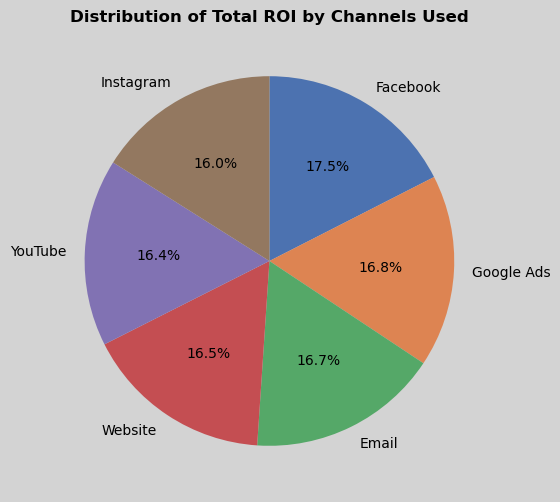

In [ ]:
pie = df.groupby(by='Channel_Used')['ROI'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6), facecolor='lightgrey')

color = sns.color_palette('deep', len(pie))

plt.pie(pie, labels=pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.title('Distribution of Total ROI by Channels Used', fontweight='bold')

plt.show()

##### Relationship between Clicks and Impressions by Chennel Used
- There's a clear positive correlation between clicks and impressions. As the number of clicks increases, so does the number of impressions.<br>
- There seems to be an upper limit to impressions at around 100,000, regardless of how many clicks occur beyond a certain point.<br>
- There's significant overlap between channels in terms of performance, indicating that no single channel consistently outperforms the others across all ranges.

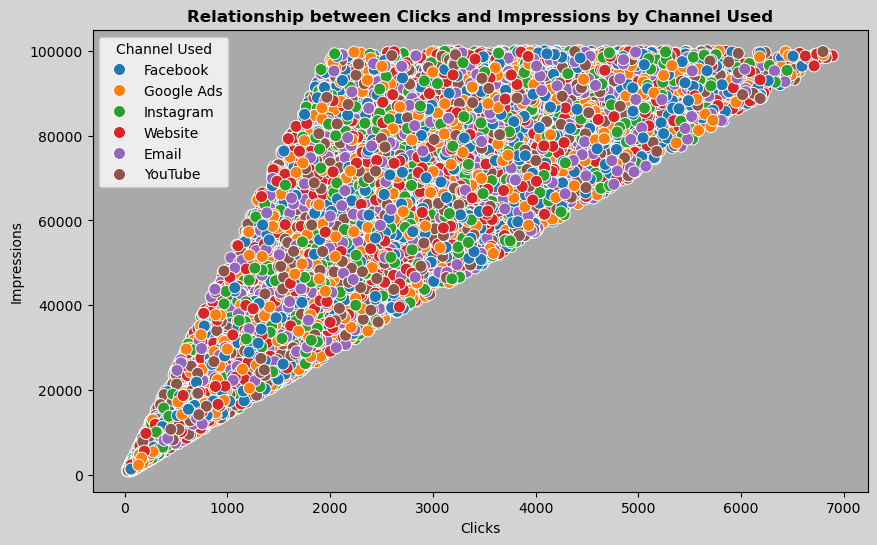

In [ ]:
plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.scatterplot(x='Clicks', y='Impressions', hue='Channel_Used', data=df , color='black', s=75)

plt.gca().set_facecolor('darkgrey')

plt.title('Relationship between Clicks and Impressions by Channel Used', fontweight='bold')
plt.legend(title='Channel Used')

plt.show()

##### Channel Effectivenes Conclusion:
- Social media campaigns consistently show the highest engagement, with a ranking of Social Media > Influencer ≈ Email > Display ≈ Search.<br>
- ROI is evenly distributed across channels, with social media accounting for nearly 50% of total ROI. In this era of social media, email campaigns still present strong competition to social media platforms.<br>
- There is a clear positive correlation between clicks and impressions across channels, but impressions appear to cap at around 100,000. No channel consistently outperforms others in this relationship.

### Time-Base Analysis:

##### Distribution of Duration
-  The 30-day duration has the highest count, with nearly 10,000 occurrences. This suggests it's the most common or preferred duration.<br>
-  The distribution is right-skewed, with a peak at 30 days and decreasing counts for longer durations.<br>
-  The 60-day duration has the lowest count, around 2,000, indicating it's the least common option.

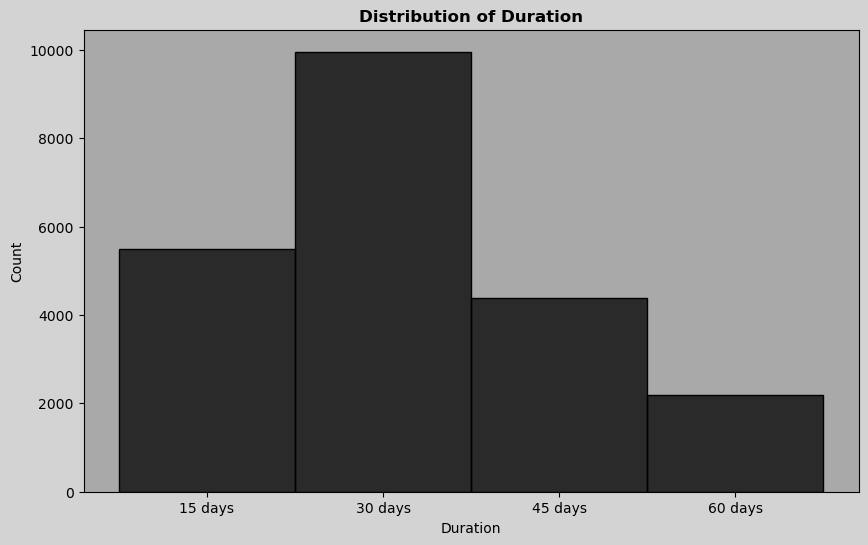

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

sorted_data = df.sort_values(by='Duration')

sns.histplot(sorted_data['Duration'], color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Distribution of Duration', fontweight='bold')

plt.show()

##### Maximum Return of Investment by Campaign Duration
- From the histplot, 30 days campaign duration has large distribution than other campaign duration.<br>
- But the 60 days campaign duration has the maximum ROI, shows that it has high potential than others.

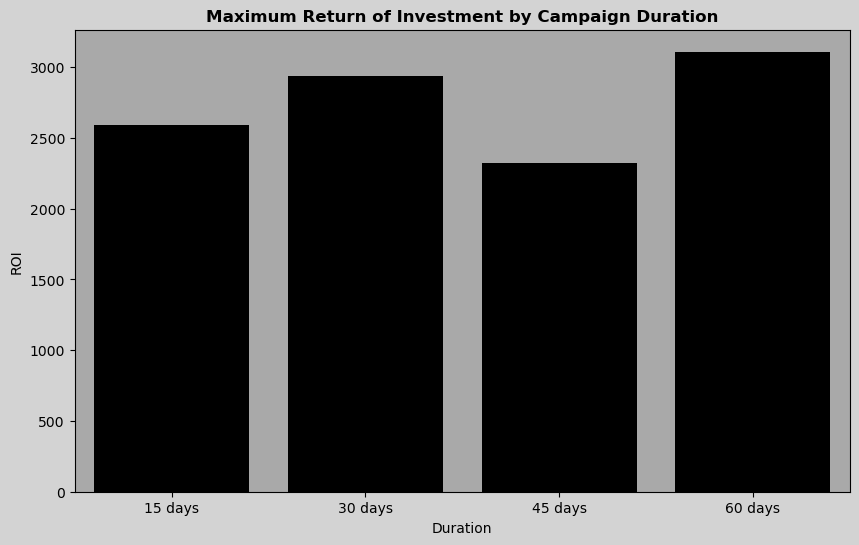

In [ ]:
plt.figure(figsize=(10, 6), facecolor='lightgrey')

order_D_ROI = df.Duration.sort_values()

sns.barplot(x='Duration', y='ROI', data=df, estimator='max', order=order_D_ROI, errorbar=None, color='blacK')

plt.gca().set_facecolor('darkgrey')

plt.title('Maximum Return of Investment by Campaign Duration', fontweight='bold')

plt.show()

##### Conversion Rate by Date (Month)
- All companies experience a noticeable dip in conversion rates in February and November, potentially indicating an industry-wide challenge or seasonal effect.<br>
- The period from August to October appears to be the strongest for most companies in terms of conversion rates.<br>
- 'Alpha Innovations' experiences the most volatility in Conversion Rate.<br>
- 'NexGen' Systems shows a significant spike in September, reaching the highest overall conversion rate.<br>
- 'TechCorp' starts the year with relatively high conversion rates but shows a general declining trend until a recovery in the latter months.<br>
- 'Data Tech Solutions' demonstrates steady growth from June to October before experiencing a sharp decline in November.<br>
- 'Innovate Industry' shows consistent down performance in conversion rate.

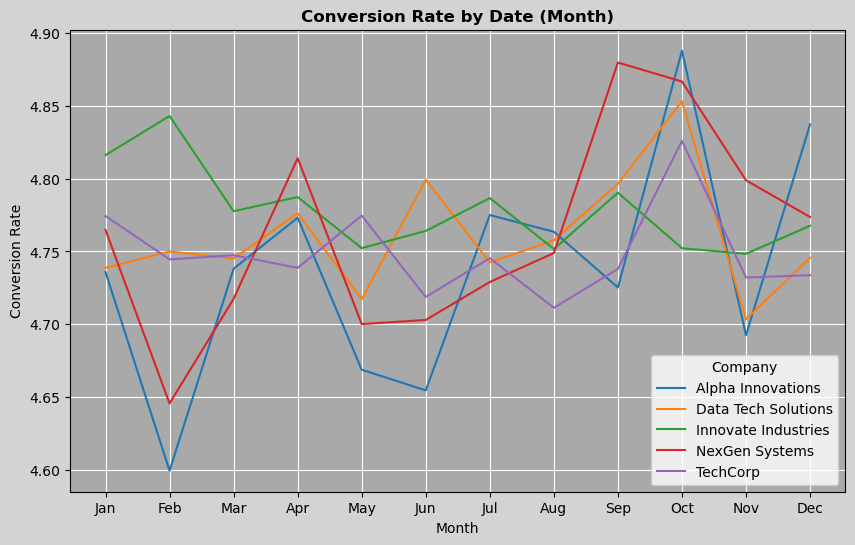

In [ ]:
import calendar

df.Date = pd.to_datetime(df['Date'], format='%d-%m-%Y')

monthly_df = df.groupby([df['Company'], df['Date'].dt.strftime('%b')]).agg({'Conversion_Rate' : 'mean'}).reset_index()

monthly_df['Date'] = pd.Categorical(monthly_df['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10,6), facecolor='lightgrey')

sns.lineplot(x='Date', y='Conversion_Rate', hue='Company', data=monthly_df, errorbar=None)

plt.gca().set_facecolor('darkgrey')

plt.title('Conversion Rate by Date (Month)', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.xlabel('Month')
plt.grid(True, color='white')

plt.show()

##### Engagement Score over Date
- The Engagement Score generally increases month-over-month, with a few exceptions.<br>
- February has the lowest engagement score. Suggesting it's the most challenging month for engagement.<br>
- The most significant increases occur between May and June, as well as October and November. However, the conversion rate has drastically decreased, indicating that the campaign is not effectively encouraging sufficient 'Call to Action' steps.<br>
- There are two plateau periods, June-July and September-October, where the engagement score remains relatively stable before increasing again.<br>
- The year ends strong with the highest engagement scores in November and December.

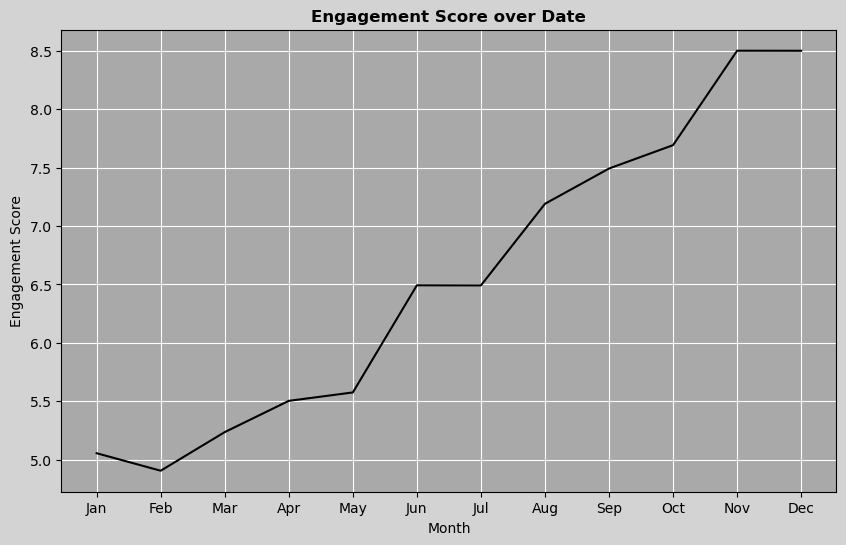

In [ ]:
eng_sc = df.groupby(df['Date'].dt.strftime('%b')).agg({'Engagement_Score' : 'mean'}).reset_index()

eng_sc['Date'] = pd.Categorical(eng_sc['Date'], categories=list(calendar.month_abbr), ordered=True)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

sns.lineplot(x='Date', y='Engagement_Score', data=eng_sc, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Engagement Score over Date', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Engagement Score')
plt.grid(True, color='white')

plt.show()

##### Time-Base Analysis Conclusion:
- The 30-day duration has the highest count, indicating it is the most preferred option. Less common durations, such as 60 days, show high potential but may require revisiting or enhanced marketing efforts to increase their appeal.<br>
- The dip in conversion rates during February and November, despite a significant increase in engagement scores, indicates a need for more effective Calls to Action (CTA).<br>
- 'Innovate Industry' shows consistent decline in conversion rates, necessitating focused improvement efforts.<br>
- Engagement spikes in May-June and October-November, providing opportunities for high-impact campaigns.<br>
- Engagement stabilizes in June-July and September-October, suggesting a need for re-engagement strategies to avoid stagnation and boost interaction.

### Geographic Analysis:

##### Acquisition Cost by Location

##### Performance Perspective
- There is no significant difference between the locations.<br>
- Same acquisition costs across locations can be beneficial if it results from resource allocation or standardization, but it may also suggest that the campaign is not optimizing for local market differences. It’s important to ensure that acquisition strategies are flexible enough to respond to location-specific factors to maximize efficiency and ROI.

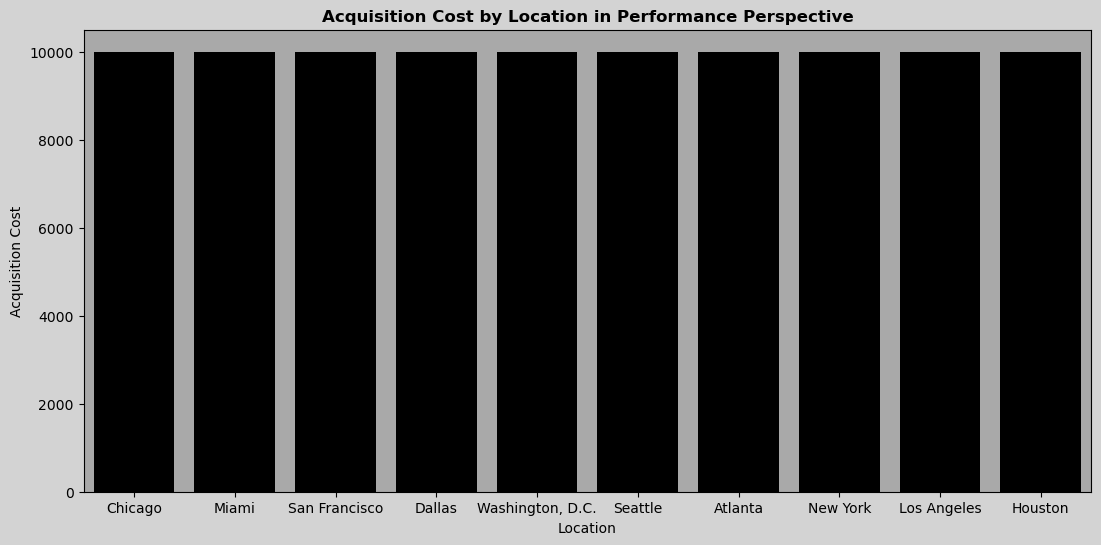

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].max().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='lightgrey')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='max', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Acquisition Cost by Location in Performance Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

##### Volume Perspective
- All cities represented are major metropolitan areas, suggesting this data focuses on high-value, competitive urban markets.<br>
- There's no clear pattern based on geography. Cities from various regions (West Coast, East Coast, South, Midwest) are distributed throughout the range.<br>
- Houston has the highest total acquisition cost. This suggests that Houston has largest volume (quantity).<br>
- Cities like Atlanta, Washington D.C., and Dallas might offer better ROI potential due to lower acquisition costs.

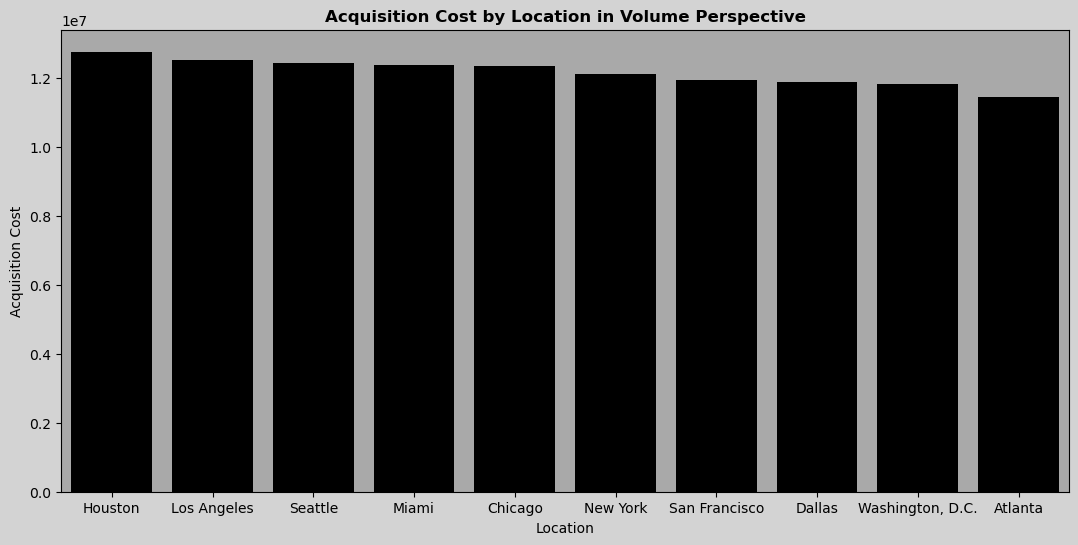

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].sum().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='lightgrey')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='sum', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Acquisition Cost by Location in Volume Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

##### Efficiency Perspective
- New York has a slightly taller bar which shows that it has higher value per acquisition (quality).<br>
- Rest of all location has more or less equal bar height

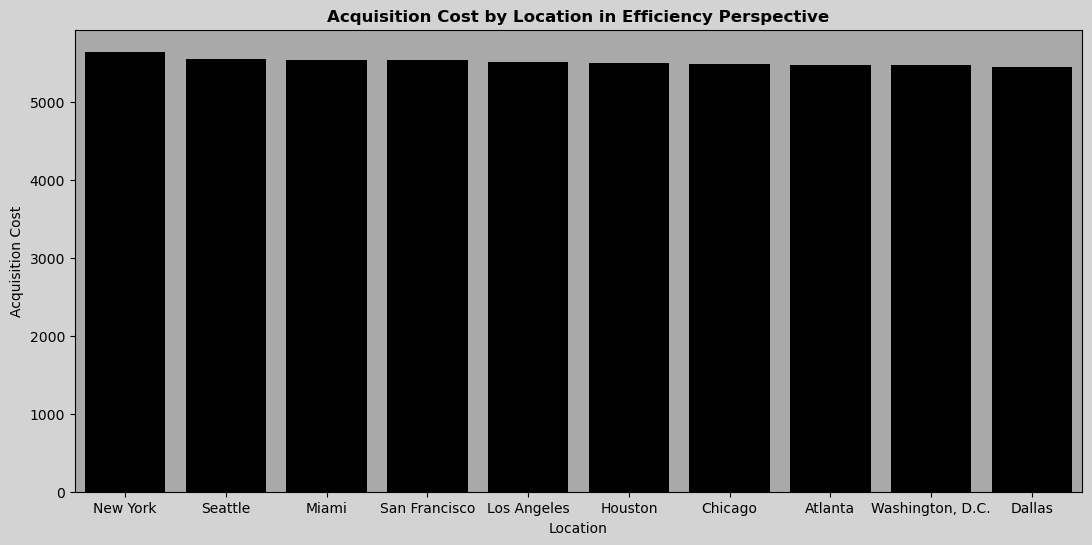

In [ ]:
loc_ord_AC = df.groupby(by='Location')['Acquisition_Cost'].mean().sort_values(ascending=False).index

plt.figure(figsize=(13, 6), facecolor='lightgrey')

sns.barplot(x='Location', y='Acquisition_Cost', data=df, estimator='mean', order=loc_ord_AC, errorbar=None, color='black')

plt.gca().set_facecolor('darkgrey')

plt.title('Acquisition Cost by Location in Efficiency Perspective', fontweight='bold')
plt.ylabel('Acquisition Cost')

plt.show()

##### Conversion Rate across Location by Target Audience
- The conversion rates are relatively consistent across locations and target audiences, generally falling between 4.5 and 5.<br>
- Younger demographics (18-24 and 25-34) generally outperform the "All Ages" category, suggesting younger audiences may be more responsive.<br>
- The segmented demographics mostly outperform the "All Ages" category, indicating that targeted marketing may be more effective.<br>
- Men's demographics often slightly outperform women's, but the gap is minimal.<br>
- Even though Women in age 25-34 are targeted more as per countplot, Men 18-24 tend to have higher conversion rates in most cities than the Women 25-34, though the differences are small.<br>
- Dallas shows the most variation between demographics may offer opportunities for more targeted marketing strategies and New York has very consistent rates across all demographics shows campaigns appear to be performing well across the board.

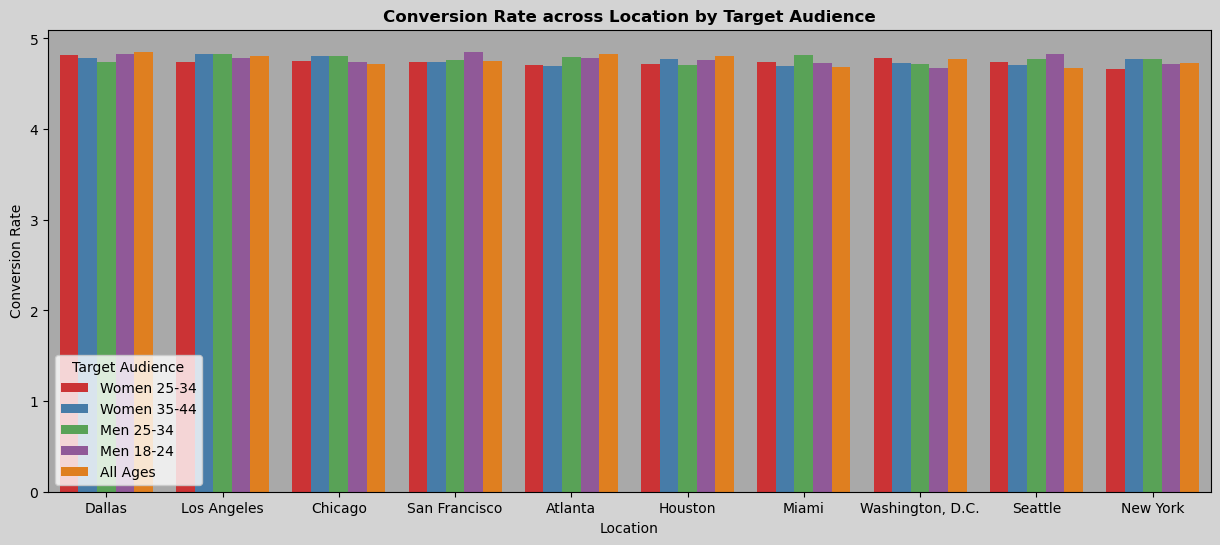

In [ ]:
plt.figure(figsize=(15, 6), facecolor='lightgrey')

loc_ord_CR = df.groupby(by='Location')['Conversion_Rate'].mean().sort_values(ascending=False).index

plt.gca().set_facecolor('darkgrey')

sns.barplot(x='Location', y='Conversion_Rate', hue='Target_Audience', data=df, order=loc_ord_CR, palette='Set1', errorbar=None)

plt.title('Conversion Rate across Location by Target Audience', fontweight='bold')
plt.ylabel('Conversion Rate')
plt.legend(loc='lower left', title='Target Audience')

plt.show()

##### Return of Investment by Location
- The returns are fairly evenly distributed across the 10 cities, ranging from 9.3% to 10.7%.<br>
- The narrow range of returns (1.4% difference between highest and lowest) suggests a competitive and efficient market across these major cities.<br>
- Surprisingly, traditionally "hot" real estate markets like San Francisco and New York show lower returns.

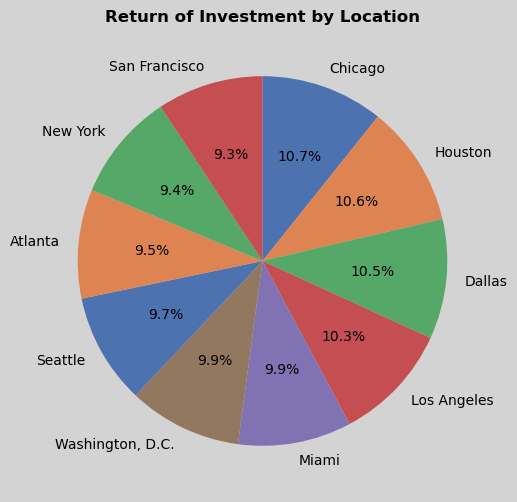

In [ ]:
roi_pie = df.groupby('Location')['ROI'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6), facecolor='lightgrey')

color = sns.color_palette('deep', len(pie))

plt.pie(roi_pie, labels=roi_pie.index, autopct='%1.1f%%', colors=color, startangle=90, counterclock=False)

plt.gca().set_facecolor('darkgrey')

plt.title('Return of Investment by Location', fontweight='bold')

plt.show()

##### Geographic Analysis Conclusion:
- While Houston has the highest sum of acquisition costs and New York has the highest average acquisition cost, it's essential to evaluate the ROI carefully. The city may present significant opportunities, but ensure that the cost aligns with expected returns before heavily investing.<br>
- Cities like Dallas and Chicago demonstrate lower acquisition costs and high ROI, indicating that the campaigns are performing well in these locations.<br>
- The data indicates that younger audiences (ages 18-34) are more responsive and convert at higher rates. Tailoring marketing strategies to appeal to these segments can enhance conversion rates and overall effectiveness.<br>
- Dallas exhibits notable demographic variation in conversion rates. Consider localized campaigns that address the specific needs and preferences of different demographic segments.<br>
- Markets like San Francisco and New York, despite their status as hot real estate markets, show lower returns with high acquisition cost. Reevaluate strategies in these cities to enhance performance, possibly by adjusting acquisition approaches or improving marketing messaging.

### Recommendations
- ##### Refine Targeting:
      Focus on improving targeting strategies to reduce acquisition costs, especially for segments with higher potential ROI. Additionally, consider extending the duration of campaigns to maximize returns, especially in months showing high engagement but lower conversion rates (April and July), allowing more time to nurture potential leads into customers.

- ##### Enhance Localization:
      Continue successful localization efforts for non-English-speaking markets while refining content to improve conversion efficiency across all languages.
  
- ##### Focus on High-Impact Channels:
      Social media, especially influencer marketing, should remain a priority due to its high engagement and ROI, but don’t neglect email, which offers consistent returns with lower acquisition costs.

- ##### Optimize Seasonal Campaigns:
      Address the dip in performance during February and November by deploying stronger Calls to Action and more engaging content tailored to these challenging months.<br>

This analysis provides a clear pathway to optimize marketing efforts across channels, audiences, and geographies, helping the company drive greater ROI and sustained growth.